# Airline Data Challenge 
### by **Jingwen Liang**

#### **Introduction**
This analysis aims to support an airline company entering the US domestic market. Using the provided datasets, we will identify key routes and metrics to optimize the company's investment decisions.


#### **Problem Statement**
The airline data challenge is considering non-cancelled round trip routes between medium and large US airports. We need to:
1. Identify 10 busiest round-trip routes.
2. Find 10 most profitable routes.
3. Recommend 5 investment routes with selected factors and calculate their breakeven points.
4. Define key performance indicators (KPIs) to track the success of the selected routes.

#### **Objective**
- Clean and merge 3 datasets(Flights, Tickets, Airport_Codes).
- Analyze the data to address problem statement.
- Provide visualizations and recommendations.

### **Plan**

1. Load Datasets: Import required libraries and load the datasets (Flights, Tickets, Airport_Codes) using pd.read_csv() and validate the structure and data types.
   
2. Data Quality Checks and Cleaning:
   - Missing Values: Identify and handle missing values. Impute missing values with median or other appropriate strategies for numerical columns. Keep missing values for specific fields (e.g., MUNICIPALITY, IATA_CODE) if they can be resolved during merging or are not critical to analysis. 
   - Outliers: Handle outliers using capping at the 95th or 99th percentile based on the data distribution and business needs.
   - Filter Data:Focus on Medium and Large Airports in US and non-canceled flights.
   - Duplicates: Remove duplicate rows to maintain data integrity.


3. Merge Datasets: Group by ORIGIN and DESTINATION in Flights and Tickets datasets separately, and then  merge group by data of Flights and Tickets. Lastly, add Airport_Codes to merged flights and tickets dataset.  

4. Data Analysis to Solve the Problem:
   - Identify the top 10 routes with the highest flight count. This provides insights into operational demand and route popularity.
   - Calculate the top 10 routes by profitability. This helps focus on routes that maximize revenue while keeping costs minimal.
   - Select 5 routes based on profitability, occupancy, passenger demand, and delays.
   - Breakeven Analysis
   - Key performance indicators (KPIs)  Recommendation

5. Final Recommendations: Provide recommendations for future data analysis, highlight limitations, and suggest data collection or processing enhancements.


## 1. Load Datasets

In [146]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
# Load Datasets
Flights = pd.read_csv("Flights.csv", low_memory=False)
Tickets = pd.read_csv("Tickets.csv")
Airport_Codes = pd.read_csv("Airport_Codes.csv")

## 2. Data Quality Checks and Cleaning

### **Explore Flights Dataset**

In [77]:
#Display the first 5 rows of Flights dataset
Flights.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [78]:
#Display the basic information of Flights dataset
Flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           object 
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(4), int64(2), object(10)
memory usage: 233.9+ MB


In [79]:
#Check missing value
Flights.isnull().sum()

FL_DATE                  0
OP_CARRIER               0
TAIL_NUM             12156
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
ORIGIN_CITY_NAME         0
DEST_AIRPORT_ID          0
DESTINATION              0
DEST_CITY_NAME           0
DEP_DELAY            50351
ARR_DELAY            55991
CANCELLED                0
AIR_TIME             56551
DISTANCE               630
OCCUPANCY_RATE         310
dtype: int64

In [80]:
#Check the number of duplicate rows in the entire dataset
Flights.duplicated().sum()

4545

In [81]:
#Filter out cancelled filghts
Flights = Flights[Flights['CANCELLED'] == 0].reset_index(drop=True)

In [82]:
Flights['FL_DATE'].unique()

array(['2019-03-02', '2019-03-03', '2019-03-09', '2019-03-10',
       '2019-03-24', '2019-03-28', '2019-03-29', '2019-03-30',
       '2019-03-20', '2019-03-25', '2019-03-26', '2019-03-31',
       '2019-03-13', '2019-03-14', '2019-03-12', '2019-03-11',
       '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18',
       '2019-03-19', '2019-03-21', '2019-03-22', '2019-03-23',
       '2019-03-27', '2019-03-01', '2019-03-04', '2019-03-05',
       '2019-03-06', '2019-03-07', '2019-03-08', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-26',
       '2019-02-27', '2019-02-28', '2019-02-01', '2019-02-02',
       '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06',
       '2019-02-07', '2019-02-08', '2019-02-09', '2019-02-10',
       '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14',
       '2019-02-15', '2019-02-16', '2019-02-25', '2019-01-21',
       '2019-01-24', '2019-01-25', '2019-01-26', '2019-

In [83]:
# Attempt conversion for each format
Flights['FL_DATE_parsed'] = pd.to_datetime(Flights['FL_DATE'], format='%Y-%m-%d', errors='coerce')
Flights.loc[Flights['FL_DATE_parsed'].isna(), 'FL_DATE_parsed'] = pd.to_datetime(
    Flights.loc[Flights['FL_DATE_parsed'].isna(), 'FL_DATE'], 
    format='%m/%d/%y', 
    errors='coerce'
)

# Replace original FL_DATE with parsed version
Flights['FL_DATE'] = Flights['FL_DATE_parsed']
Flights = Flights.drop(columns=['FL_DATE_parsed'])

# Check for remaining NaT values
print(f"Remaining NaT values: {Flights['FL_DATE'].isna().sum()}")


Remaining NaT values: 0


In [84]:
# Convert AIR_TIME AND DISTANCE FROM Object to Numeric
Flights['AIR_TIME'] = pd.to_numeric(Flights['AIR_TIME'], errors='coerce')
Flights['DISTANCE'] = pd.to_numeric(Flights['DISTANCE'], errors='coerce')

In [85]:
#Drop the duplicate rows
Flights.drop_duplicates(inplace=True)

In [86]:
Flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859862 entries, 0 to 1859861
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   OP_CARRIER         object        
 2   TAIL_NUM           object        
 3   OP_CARRIER_FL_NUM  object        
 4   ORIGIN_AIRPORT_ID  int64         
 5   ORIGIN             object        
 6   ORIGIN_CITY_NAME   object        
 7   DEST_AIRPORT_ID    int64         
 8   DESTINATION        object        
 9   DEST_CITY_NAME     object        
 10  DEP_DELAY          float64       
 11  ARR_DELAY          float64       
 12  CANCELLED          float64       
 13  AIR_TIME           float64       
 14  DISTANCE           float64       
 15  OCCUPANCY_RATE     float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(7)
memory usage: 241.2+ MB


In [87]:
Flights.isnull().sum()

FL_DATE                 0
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY            4368
CANCELLED               0
AIR_TIME             4616
DISTANCE              268
OCCUPANCY_RATE         31
dtype: int64

#### **Explore Outliers**

In [88]:
Flights.describe()

,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
count,1859862,1.859862e+06,1.859862e+06,1.859862e+06,1.855494e+06,1859862.0,1.855246e+06,1.859594e+06,1.859831e+06
mean,2019-02-15 10:13:27.923169280,1.268602e+04,1.268619e+04,1.078066e+01,5.660219e+00,0.0,1.093413e+02,7.722522e+02,6.502115e-01
min,2019-01-01 00:00:00,1.013500e+04,1.013500e+04,-6.300000e+01,-9.400000e+01,0.0,-1.210000e+02,-1.947000e+03,3.000000e-01
25%,2019-01-24 00:00:00,1.129200e+04,1.129200e+04,-6.000000e+00,-1.500000e+01,0.0,5.900000e+01,3.440000e+02,4.800000e-01
50%,2019-02-16 00:00:00,1.288900e+04,1.288900e+04,-2.000000e+00,-6.000000e+00,0.0,9.100000e+01,6.120000e+02,6.500000e-01
75%,2019-03-10 00:00:00,1.405700e+04,1.405700e+04,7.000000e+00,8.000000e+00,0.0,1.390000e+02,1.013000e+03,8.200000e-01
max,2019-03-31 00:00:00,1.621800e+04,1.621800e+04,2.941000e+03,2.923000e+03,0.0,2.222000e+03,9.898000e+03,1.000000e+00
std,NaN,1.521714e+03,1.521891e+03,5.009182e+01,5.243156e+01,0.0,7.025902e+01,5.817800e+02,2.019955e-01


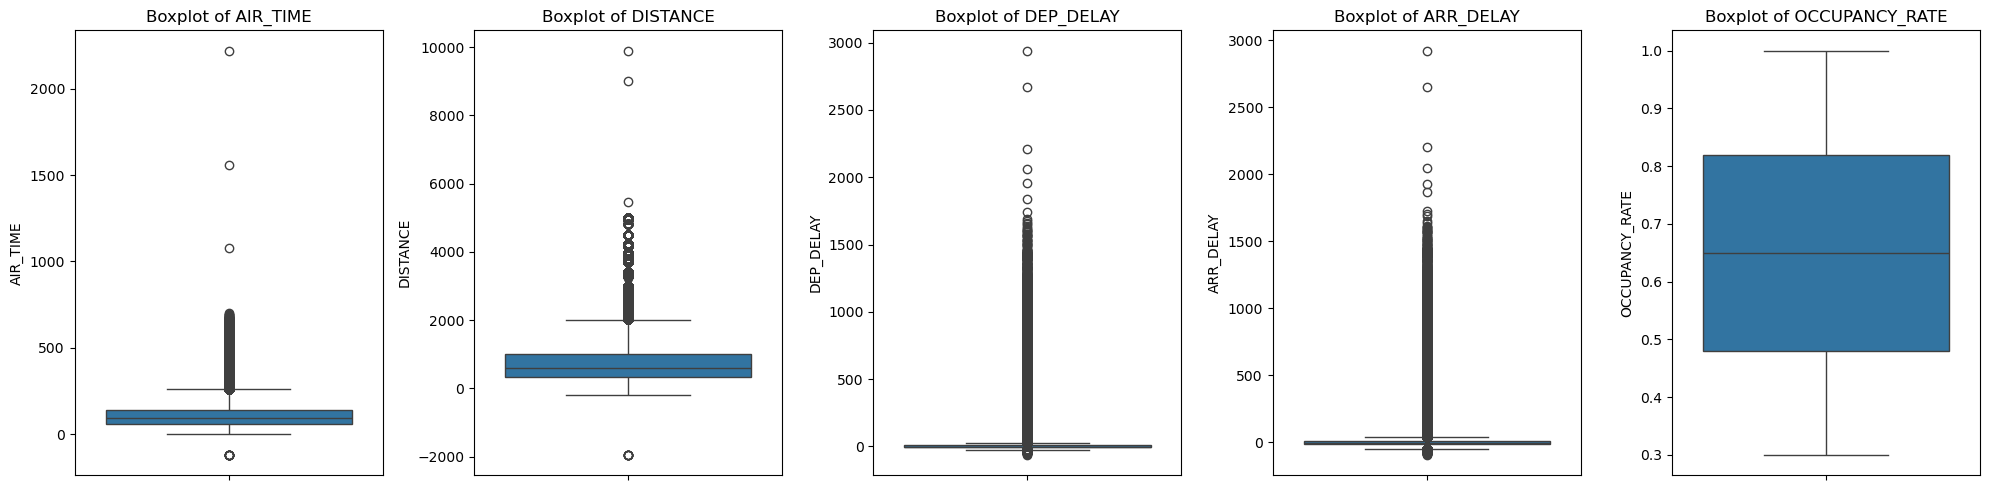

In [89]:
Flights_to_check = ['AIR_TIME', 'DISTANCE', 'DEP_DELAY', 'ARR_DELAY', 'OCCUPANCY_RATE']

# Create subplots: one row, multiple columns
fig, axes = plt.subplots(1, len(Flights_to_check), figsize=(20, 5))

# Plot each boxplot
for i, column in enumerate(Flights_to_check):
    sns.boxplot(y=Flights[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
fig_name = "Boxplots_Flights_metrics.png"
plt.savefig(fig_name, format='png', dpi=600)
plt.show()

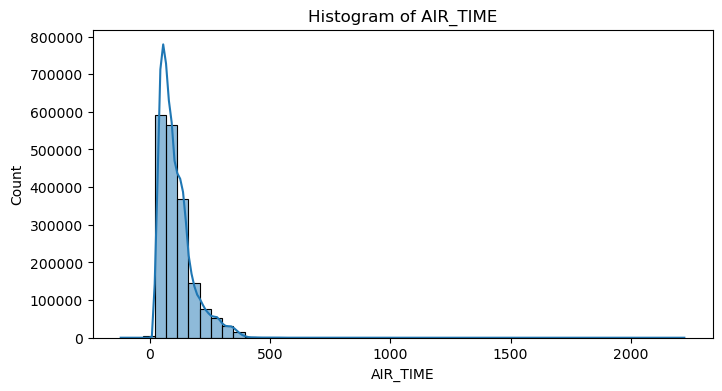

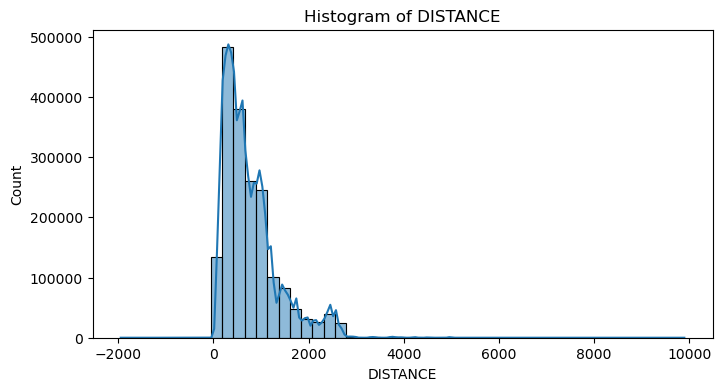

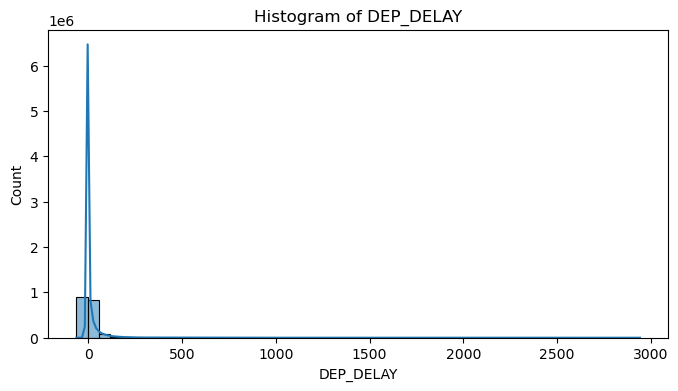

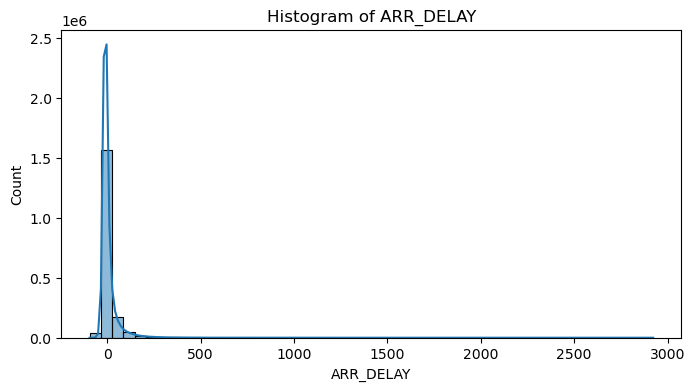

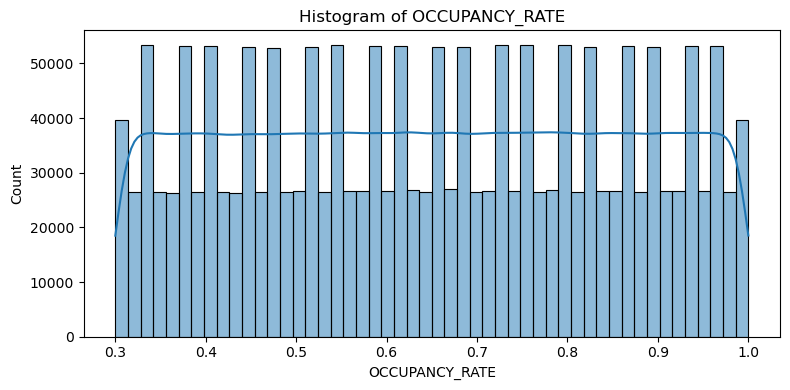

In [90]:
for column in Flights_to_check:
    plt.figure(figsize=(8, 4))
    sns.histplot(Flights[column], bins=50, kde=True)
    plt.title(f'Histogram of {column}')
    
plt.tight_layout()
fig_name = "Histograms_Flights_metrics.png"
plt.savefig(fig_name, format='png', dpi=600)
plt.show()

**Obeservation**

There are significant outliers in AIR_TIME, DISTANCE, DEP_DELAY, and ARR_DELAY, while there are no notable outliers in OCCUPANCY_RATE.

**AIR_TIME**: There are extreme outliers beyond 1,000 minutes. They might represent long-haul flights or data anomalies. The majority of flights have air times under 500 minutes, with a right-skewed distribution.

**DISTANCE**: There are extreme outliers beyond 6,000 miles and a negaive outlier. The negative outlier is invalid as distance should not be negative. The majority of flights cover distances under 2,000 miles, with a right-skewed distribution.

**DEP_DELAY**: There are extreme outliers beyond 1,000 minutes, showing extreme departure delays. Most flights have departue delays under 100 minutes, with a right-skewed distribution.

**AIR_DELAY**: There are extreme outliers beyond 1,000 minutes. Most flights have arrival delays under 100 minutes, with a right-skewed distribution.

**Outliers Handling Approch**

We plan to cap the data at the 95th percentile to retain the dataset while limiting the influence of extreme values. This approach reduces the impact of outliers, addresses right skewness, and preserves business-relevant outliers like long delays or long-distance flights. 

In [91]:
for column in Flights_to_check:
    lower_bound = Flights[column].quantile(0.05) 
    upper_bound = Flights[column].quantile(0.95) 

    Flights[column] = Flights[column].clip(lower=lower_bound, upper=upper_bound)

In [92]:
Flights.describe()

,FL_DATE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
count,1859862,1.859862e+06,1.859862e+06,1.859862e+06,1.855494e+06,1859862.0,1.855246e+06,1.859594e+06,1.859831e+06
mean,2019-02-15 10:13:27.923169280,1.268602e+04,1.268619e+04,6.378389e+00,1.443649e+00,0.0,1.069563e+02,7.550108e+02,6.502103e-01
min,2019-01-01 00:00:00,1.013500e+04,1.013500e+04,-1.100000e+01,-2.800000e+01,0.0,3.300000e+01,1.560000e+02,3.400000e-01
25%,2019-01-24 00:00:00,1.129200e+04,1.129200e+04,-6.000000e+00,-1.500000e+01,0.0,5.900000e+01,3.440000e+02,4.800000e-01
50%,2019-02-16 00:00:00,1.288900e+04,1.288900e+04,-2.000000e+00,-6.000000e+00,0.0,9.100000e+01,6.120000e+02,6.500000e-01
75%,2019-03-10 00:00:00,1.405700e+04,1.405700e+04,7.000000e+00,8.000000e+00,0.0,1.390000e+02,1.013000e+03,8.200000e-01
max,2019-03-31 00:00:00,1.621800e+04,1.621800e+04,7.700000e+01,7.700000e+01,0.0,2.600000e+02,2.084000e+03,9.600000e-01
std,NaN,1.521714e+03,1.521891e+03,2.226616e+01,2.604003e+01,0.0,6.185672e+01,5.209520e+02,1.983165e-01


#### **Handle Missing Values**

We plan to impute missing values with global median, which provides robust handling of skewed distributions and minimizes the impact of outliers.

In [93]:
# Impute missing values with global median
columns_to_impute = ['AIR_TIME', 'DISTANCE', 'DEP_DELAY', 'ARR_DELAY', 'OCCUPANCY_RATE']

for col in columns_to_impute:
    Flights[col] = Flights[col].fillna(Flights[col].median())

In [94]:
Flights.isnull().sum()

FL_DATE              0
OP_CARRIER           0
TAIL_NUM             0
OP_CARRIER_FL_NUM    0
ORIGIN_AIRPORT_ID    0
ORIGIN               0
ORIGIN_CITY_NAME     0
DEST_AIRPORT_ID      0
DESTINATION          0
DEST_CITY_NAME       0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
AIR_TIME             0
DISTANCE             0
OCCUPANCY_RATE       0
dtype: int64

### **Explore Tickets Dataset**

In [95]:
#Display the first 5 rows of Tickets dataset
Tickets.head()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.0,MQ,1.0,309.0,MGM


In [96]:
#Display the basic information of Tickets dataset
Tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1166325 non-null  object 
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 106.9+ MB


In [97]:
#Check missing value and showing missing values count for each column
Tickets.isnull().sum()

ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
ROUNDTRIP               0
REPORTING_CARRIER       0
PASSENGERS           1977
ITIN_FARE             960
DESTINATION             0
dtype: int64

In [98]:
#Check the number of duplicate rows in the entire dataset
Tickets.duplicated().sum()

71898

In [99]:
#Filter and keep roundtrip only
Tickets = Tickets[Tickets["ROUNDTRIP"] == 1].reset_index(drop=True)

In [100]:
Tickets['ITIN_FARE'] = pd.to_numeric(Tickets['ITIN_FARE'], errors='coerce')

In [101]:
#Drop the duplicate rows
Tickets.drop_duplicates(inplace=True)

In [102]:
Tickets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 661036 entries, 0 to 672779
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ITIN_ID            661036 non-null  int64  
 1   YEAR               661036 non-null  int64  
 2   QUARTER            661036 non-null  int64  
 3   ORIGIN             661036 non-null  object 
 4   ORIGIN_COUNTRY     661036 non-null  object 
 5   ORIGIN_STATE_ABR   661036 non-null  object 
 6   ORIGIN_STATE_NM    661036 non-null  object 
 7   ROUNDTRIP          661036 non-null  float64
 8   REPORTING_CARRIER  661036 non-null  object 
 9   PASSENGERS         660076 non-null  float64
 10  ITIN_FARE          659379 non-null  float64
 11  DESTINATION        661036 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 65.6+ MB


In [103]:
Tickets.isnull().sum()

ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
ROUNDTRIP               0
REPORTING_CARRIER       0
PASSENGERS            960
ITIN_FARE            1657
DESTINATION             0
dtype: int64

In [104]:
Tickets[['PASSENGERS', 'ITIN_FARE']]

,PASSENGERS,ITIN_FARE
0,1.0,736.0
1,1.0,570.0
2,1.0,564.0
3,1.0,345.0
4,1.0,1647.0
...,...,...
672773,1.0,585.0
672775,1.0,692.0
672776,1.0,600.0
672778,1.0,705.0


#### **Explore Outliers**

In [105]:
Tickets.describe()

,ITIN_ID,YEAR,QUARTER,ROUNDTRIP,PASSENGERS,ITIN_FARE
count,6.610360e+05,661036.0,661036.0,661036.0,660076.000000,659379.000000
mean,1.724095e+11,2019.0,1.0,1.0,1.961235,473.245517
std,6.765604e+10,0.0,0.0,0.0,5.151791,344.206517
min,2.019119e+06,2019.0,1.0,1.0,1.000000,0.000000
25%,2.019116e+11,2019.0,1.0,1.0,1.000000,280.000000
50%,2.019128e+11,2019.0,1.0,1.0,1.000000,415.000000
75%,2.019141e+11,2019.0,1.0,1.0,1.000000,595.000000
max,2.019153e+11,2019.0,1.0,1.0,681.000000,38400.000000


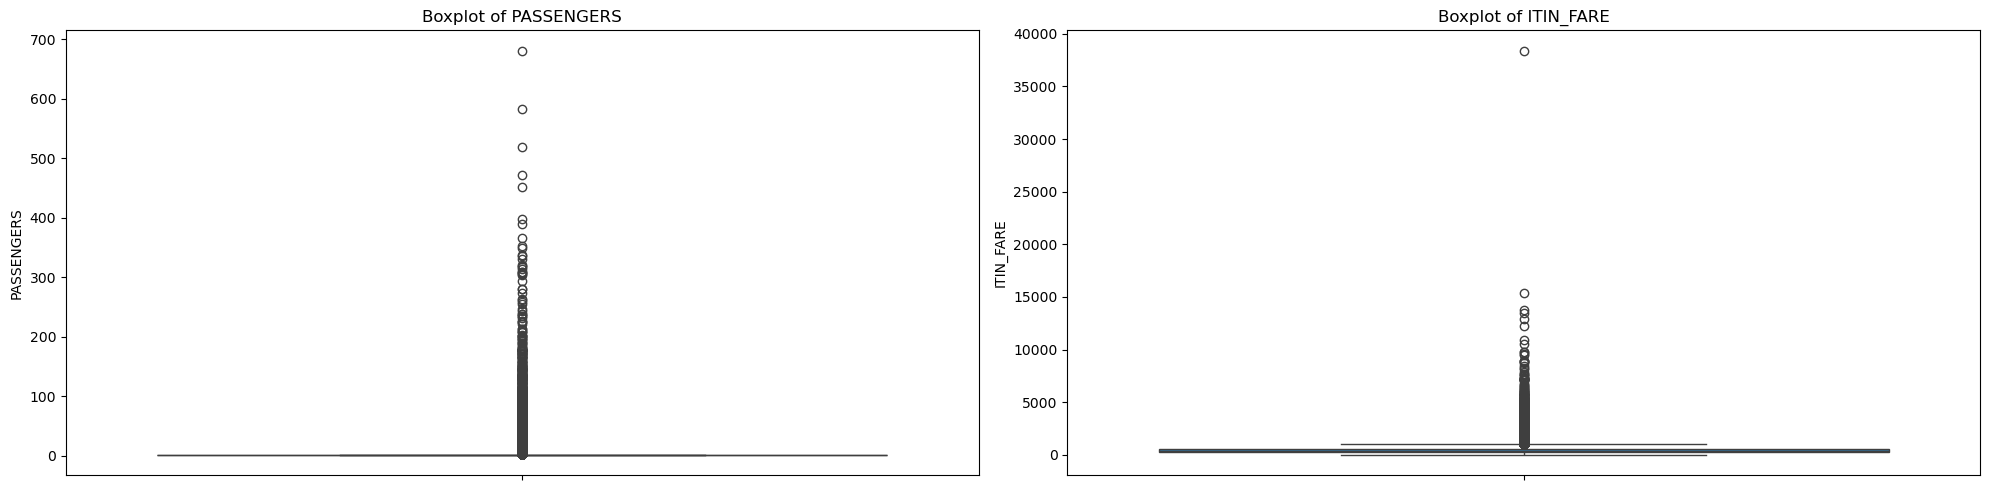

In [106]:
Tickets_to_check = ['PASSENGERS', 'ITIN_FARE']

# Create subplots: one row, multiple columns
fig, axes = plt.subplots(1, len(Tickets_to_check), figsize=(20, 5))

# Plot each boxplot
for i, column in enumerate(Tickets_to_check):
    sns.boxplot(y=Tickets[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
fig_name = "Boxplots_Tickets_metrics.png"
plt.savefig(fig_name, format='png', dpi=600)
plt.show()

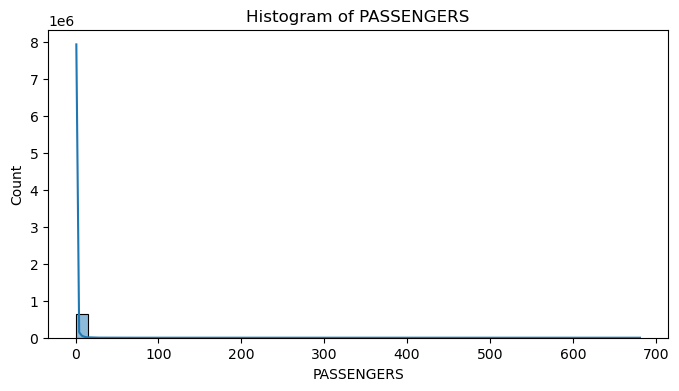

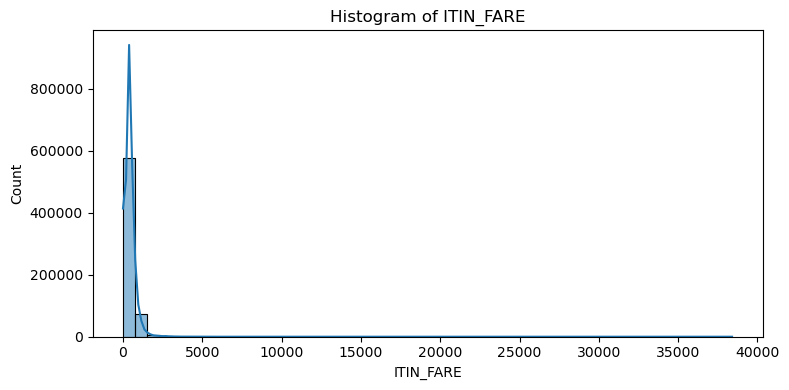

In [107]:
# Plot histograms
for column in Tickets_to_check:
    plt.figure(figsize=(8, 4))
    sns.histplot(Tickets[column], bins=50, kde=True)
    plt.title(f'Histogram of {column}')
    
plt.tight_layout()
fig_name = "Histograms_Tickets_metrics.png"
plt.savefig(fig_name, format='png', dpi=600)
plt.show()

**Obeservation**

There are significant outliers in PASSENGERS and ITIN_FARE based on boxplots and histograms.

**PASSENGERS**: There are extreme outliers beyond 700 passengers. Most itineraries have fewer than 100 passengers.The distribution is highly right-skewed, with the majority of data concentrated at the lower end.

**ITIN_FARE**:There are extreme outliers beyond 30,000 in the fare. The majority of itineraries have fares below 5,000. The distribution is highly right-skewed, with a long tail toward higher values.

**Outliers Handling Approch**

Since the PASSENGERS shows route demand and the ITIN_FARE shows cost, these two columns are critical for profitability analysis and should not be entirely removed. We plan to cap the data at the 99th percentile to retain more high-value data points. This approach can reduce the influence of extreme values, address skewness, and preserve business-relevant information with passenger counts and fare values.

In [108]:
for column in Tickets_to_check:
    lower_bound = Tickets[column].quantile(0.01) 
    upper_bound = Tickets[column].quantile(0.99) 
    
    Tickets[column] = Tickets[column].clip(lower=lower_bound, upper=upper_bound)

In [109]:
Tickets.describe()

,ITIN_ID,YEAR,QUARTER,ROUNDTRIP,PASSENGERS,ITIN_FARE
count,6.610360e+05,661036.0,661036.0,661036.0,660076.000000,659379.000000
mean,1.724095e+11,2019.0,1.0,1.0,1.770261,466.293244
std,6.765604e+10,0.0,0.0,0.0,2.351605,295.674426
min,2.019119e+06,2019.0,1.0,1.0,1.000000,11.000000
25%,2.019116e+11,2019.0,1.0,1.0,1.000000,280.000000
50%,2.019128e+11,2019.0,1.0,1.0,1.000000,415.000000
75%,2.019141e+11,2019.0,1.0,1.0,1.000000,595.000000
max,2.019153e+11,2019.0,1.0,1.0,17.000000,1656.000000


#### **Handle Missing Values**
We plan to impute missing values with global median, which provides robust to handle skewed distributions and minimize the impact of outliers.

In [110]:
# Impute missing values with global median
for col in Tickets_to_check:
    Tickets[col] = Tickets[col].fillna(Tickets[col].median())

In [111]:
Tickets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 661036 entries, 0 to 672779
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ITIN_ID            661036 non-null  int64  
 1   YEAR               661036 non-null  int64  
 2   QUARTER            661036 non-null  int64  
 3   ORIGIN             661036 non-null  object 
 4   ORIGIN_COUNTRY     661036 non-null  object 
 5   ORIGIN_STATE_ABR   661036 non-null  object 
 6   ORIGIN_STATE_NM    661036 non-null  object 
 7   ROUNDTRIP          661036 non-null  float64
 8   REPORTING_CARRIER  661036 non-null  object 
 9   PASSENGERS         661036 non-null  float64
 10  ITIN_FARE          661036 non-null  float64
 11  DESTINATION        661036 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 65.6+ MB


### **Explore Airport Codes Dataset**

In [112]:
#Display the first 5 rows of Airport_Codes dataset
Airport_Codes.head()

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.0,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.0,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.0,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.0,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,Newport,NaN,"-91.254898, 35.6087"


In [113]:
#Display the basic information of Airport_Codes dataset
Airport_Codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


In [114]:
#Check missing value and showing missing values count for each column
Airport_Codes.isnull().sum()

TYPE                0
NAME                0
ELEVATION_FT     7015
CONTINENT       27843
ISO_COUNTRY       247
MUNICIPALITY     5706
IATA_CODE       46187
COORDINATES         0
dtype: int64

In [115]:
#Check the number of duplicate rows in the entire dataset
Airport_Codes.duplicated().sum()

101

In [116]:
#Check the unique type of airports
Airport_Codes["TYPE"].unique()

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

In [117]:
#Filter and keep medium and large airports only
Airport_Codes = Airport_Codes[Airport_Codes["TYPE"].isin(["medium_airport", "large_airport"])].reset_index(drop=True)
#Check
Airport_Codes["TYPE"].unique()

array(['medium_airport', 'large_airport'], dtype=object)

In [118]:
#Filter and keep US airports only 
Airport_Codes = Airport_Codes[Airport_Codes["ISO_COUNTRY"] == "US"].reset_index(drop=True)
#Check
Airport_Codes["ISO_COUNTRY"].unique()

array(['US'], dtype=object)

In [119]:
#Drop the duplicate rows
Airport_Codes.drop_duplicates(inplace=True)

In [120]:
#Drop unnecessary columns
Airport_Codes.drop(columns=['ELEVATION_FT', 'CONTINENT','ISO_COUNTRY', 'MUNICIPALITY', 'COORDINATES'], inplace=True)

In [121]:
Airport_Codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TYPE       858 non-null    object
 1   NAME       858 non-null    object
 2   IATA_CODE  821 non-null    object
dtypes: object(3)
memory usage: 20.2+ KB


In [122]:
Airport_Codes.isnull().sum()

TYPE          0
NAME          0
IATA_CODE    37
dtype: int64

#### **Handle Missing Value**

We plan to keep missing values IATA_CODE  during this stage to preserve the dataset’s completeness. Because IATA_CODE is critical for merging with Flights and Tickets datasets. Dropping rows with missing IATA_CODE now may lead to the loss of relevant airport data.After merging with other datasets, we will revisit these missing values to determine if they can be resolved using additional information. 

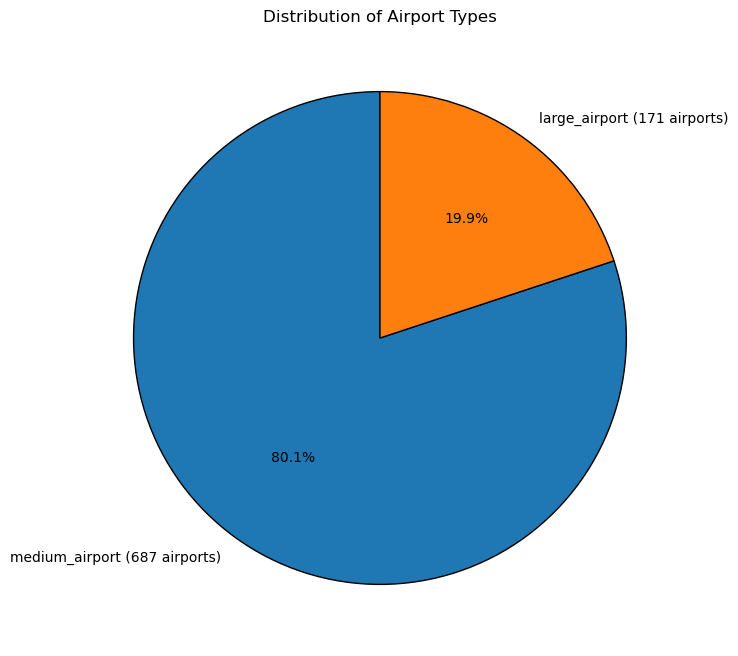

In [123]:
#Distribution of medium airports and large airports
type_distribution = Airport_Codes['TYPE'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    type_distribution, 
    labels=[f"{label} ({count} airports)" for label, count in zip(type_distribution.index, type_distribution)],  # Display labels with counts
    autopct='%1.1f%%',  # Display percentages
    startangle=90, 
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution of Airport Types')
fig_name = "PieChart_AirportTypes.png"
plt.savefig(fig_name, format='png', dpi=600)
plt.show()

**Observation**: Among the 858 airports, 687 are medium airports, accounting for 80.1%, while 171 are large airports, accounting for 19.9%. 

This highlights an imbalance in the distribution, with most being medium airports. This disparity may impact factors like route availability, regional connectivity, passenger capacities, or revenue generation. Further analysis can explore whether this distribution significantly influences profitability or route performance.


Data Processing obervation:
Data issue:
Flights Dataset:
Tickets Dataset:
Airport_Codes Dataset:

## 3. Data Merge

Based on the problem statement, this project mainly focuses on exploring routes. Therefore, we plan to group by ORIGIN and DESTINATION in Flights and Tickets datasets separately before merging, which can reduce data size for effciency. Then we merge Flights and Tickets firts to avoid losing key data, and add Airport_Codes last. This merge order can isolates the impact of missing values in Airport_Codes.

In [124]:
Flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859862 entries, 0 to 1859861
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   OP_CARRIER         object        
 2   TAIL_NUM           object        
 3   OP_CARRIER_FL_NUM  object        
 4   ORIGIN_AIRPORT_ID  int64         
 5   ORIGIN             object        
 6   ORIGIN_CITY_NAME   object        
 7   DEST_AIRPORT_ID    int64         
 8   DESTINATION        object        
 9   DEST_CITY_NAME     object        
 10  DEP_DELAY          float64       
 11  ARR_DELAY          float64       
 12  CANCELLED          float64       
 13  AIR_TIME           float64       
 14  DISTANCE           float64       
 15  OCCUPANCY_RATE     float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(7)
memory usage: 241.2+ MB


In [125]:
Flights['FL_DATE'].unique()

<DatetimeArray>
['2019-03-02 00:00:00', '2019-03-03 00:00:00', '2019-03-09 00:00:00',
 '2019-03-10 00:00:00', '2019-03-24 00:00:00', '2019-03-28 00:00:00',
 '2019-03-29 00:00:00', '2019-03-30 00:00:00', '2019-03-20 00:00:00',
 '2019-03-25 00:00:00', '2019-03-26 00:00:00', '2019-03-31 00:00:00',
 '2019-03-13 00:00:00', '2019-03-14 00:00:00', '2019-03-12 00:00:00',
 '2019-03-11 00:00:00', '2019-03-15 00:00:00', '2019-03-16 00:00:00',
 '2019-03-17 00:00:00', '2019-03-18 00:00:00', '2019-03-19 00:00:00',
 '2019-03-21 00:00:00', '2019-03-22 00:00:00', '2019-03-23 00:00:00',
 '2019-03-27 00:00:00', '2019-03-01 00:00:00', '2019-03-04 00:00:00',
 '2019-03-05 00:00:00', '2019-03-06 00:00:00', '2019-03-07 00:00:00',
 '2019-03-08 00:00:00', '2019-02-17 00:00:00', '2019-02-18 00:00:00',
 '2019-02-19 00:00:00', '2019-02-20 00:00:00', '2019-02-21 00:00:00',
 '2019-02-22 00:00:00', '2019-02-23 00:00:00', '2019-02-24 00:00:00',
 '2019-02-26 00:00:00', '2019-02-27 00:00:00', '2019-02-28 00:00:00',
 '20

In [126]:
Tickets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 661036 entries, 0 to 672779
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ITIN_ID            661036 non-null  int64  
 1   YEAR               661036 non-null  int64  
 2   QUARTER            661036 non-null  int64  
 3   ORIGIN             661036 non-null  object 
 4   ORIGIN_COUNTRY     661036 non-null  object 
 5   ORIGIN_STATE_ABR   661036 non-null  object 
 6   ORIGIN_STATE_NM    661036 non-null  object 
 7   ROUNDTRIP          661036 non-null  float64
 8   REPORTING_CARRIER  661036 non-null  object 
 9   PASSENGERS         661036 non-null  float64
 10  ITIN_FARE          661036 non-null  float64
 11  DESTINATION        661036 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 65.6+ MB


In [127]:
Tickets['YEAR'].unique()

array([2019], dtype=int64)

In [128]:
Tickets['QUARTER'].unique()

array([1], dtype=int64)

In [129]:
Airport_Codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TYPE       858 non-null    object
 1   NAME       858 non-null    object
 2   IATA_CODE  821 non-null    object
dtypes: object(3)
memory usage: 20.2+ KB


In [130]:
# Group Flights dataset by ORIGIN and DESTINATION
Flights_grouped = Flights.groupby(['ORIGIN', 'DESTINATION']).agg({
    'ORIGIN_CITY_NAME': 'first',
    'DEST_CITY_NAME': 'first',
    'DEP_DELAY': 'sum',
    'ARR_DELAY': 'sum',
    'AIR_TIME': 'sum',
    'DISTANCE': 'mean',
    'OCCUPANCY_RATE': 'mean',
    'FL_DATE': 'count'  # Total number of flights
}).rename(columns={'FL_DATE': 'FLIGHT_COUNT'}).reset_index()

# Group Tickets  dataset by ORIGIN and DESTINATION
Tickets_grouped = Tickets.groupby(['ORIGIN', 'DESTINATION']).agg({
    'PASSENGERS': 'sum',
    'ITIN_FARE': 'mean'
}).reset_index()

In [131]:
# Merge Tickets to Flights
Flights_Tickets = Flights_grouped.merge(
    Tickets_grouped,
    on=['ORIGIN', 'DESTINATION'],
    how='left',
    suffixes=('_flights', '_tickets'))


In [132]:
Flights_Tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORIGIN            5917 non-null   object 
 1   DESTINATION       5917 non-null   object 
 2   ORIGIN_CITY_NAME  5917 non-null   object 
 3   DEST_CITY_NAME    5917 non-null   object 
 4   DEP_DELAY         5917 non-null   float64
 5   ARR_DELAY         5917 non-null   float64
 6   AIR_TIME          5917 non-null   float64
 7   DISTANCE          5917 non-null   float64
 8   OCCUPANCY_RATE    5917 non-null   float64
 9   FLIGHT_COUNT      5917 non-null   int64  
 10  PASSENGERS        5798 non-null   float64
 11  ITIN_FARE         5798 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 554.8+ KB


In [133]:
# Merge with Airport Codes for ORIGIN
Merged_data = Flights_Tickets.merge(
    Airport_Codes,
    left_on='ORIGIN',
    right_on='IATA_CODE',
    how='left',
    suffixes=('', '_origin') 
).drop(columns=['IATA_CODE'])  # Drop redundant IATA_CODE


# Merge with Airport Codes for DESTINATION
Merged_data = Merged_data.merge(
    Airport_Codes,
    left_on='DESTINATION',
    right_on='IATA_CODE',
    how='left',
    suffixes=('', '_destination')  
).drop(columns=['IATA_CODE'])  # Drop redundant IATA_CODE


In [134]:
# Add a new column that describes the route
Merged_data['ROUTE'] = Merged_data['ORIGIN_CITY_NAME'] + ' (' + Merged_data['ORIGIN'] + ')' + ' to ' + \
                       Merged_data['DEST_CITY_NAME'] + ' (' + Merged_data['DESTINATION'] + ')'

In [135]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORIGIN            5917 non-null   object 
 1   DESTINATION       5917 non-null   object 
 2   ORIGIN_CITY_NAME  5917 non-null   object 
 3   DEST_CITY_NAME    5917 non-null   object 
 4   DEP_DELAY         5917 non-null   float64
 5   ARR_DELAY         5917 non-null   float64
 6   AIR_TIME          5917 non-null   float64
 7   DISTANCE          5917 non-null   float64
 8   OCCUPANCY_RATE    5917 non-null   float64
 9   FLIGHT_COUNT      5917 non-null   int64  
 10  PASSENGERS        5798 non-null   float64
 11  ITIN_FARE         5798 non-null   float64
 12  TYPE              5770 non-null   object 
 13  NAME              5770 non-null   object 
 14  TYPE_destination  5769 non-null   object 
 15  NAME_destination  5769 non-null   object 
 16  ROUTE             5917 non-null   object 


In [136]:
Merged_data.head()

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,FLIGHT_COUNT,PASSENGERS,ITIN_FARE,TYPE,NAME,TYPE_destination,NAME_destination,ROUTE
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",525.0,439.0,23225.0,692.0,0.641198,217,56.0,506.274510,medium_airport,Lehigh Valley International Airport,large_airport,Hartsfield Jackson Atlanta International Airport,"Allentown/Bethlehem/Easton, PA (ABE) to Atlant..."
1,ABE,CLT,"Allentown/Bethlehem/Easton, PA","Charlotte, NC",292.0,393.0,24842.0,481.0,0.665219,251,29.0,514.192308,medium_airport,Lehigh Valley International Airport,large_airport,Charlotte Douglas International Airport,"Allentown/Bethlehem/Easton, PA (ABE) to Charlo..."
2,ABE,DTW,"Allentown/Bethlehem/Easton, PA","Detroit, MI",1677.0,544.0,20691.0,425.0,0.640161,248,41.0,366.777778,medium_airport,Lehigh Valley International Airport,large_airport,Detroit Metropolitan Wayne County Airport,"Allentown/Bethlehem/Easton, PA (ABE) to Detroi..."
3,ABE,FLL,"Allentown/Bethlehem/Easton, PA","Fort Lauderdale, FL",172.0,107.0,2913.0,1041.0,0.581500,20,85.0,266.058824,medium_airport,Lehigh Valley International Airport,large_airport,Fort Lauderdale Hollywood International Airport,"Allentown/Bethlehem/Easton, PA (ABE) to Fort L..."
4,ABE,ORD,"Allentown/Bethlehem/Easton, PA","Chicago, IL",1758.0,930.0,17637.0,654.0,0.670943,159,21.0,581.588235,medium_airport,Lehigh Valley International Airport,large_airport,Chicago O'Hare International Airport,"Allentown/Bethlehem/Easton, PA (ABE) to Chicag..."


## 4. Data Analysis to Solve the Problem

### 1. Find 10 busiest round trip routes in terms of number of round trip flights in the quarter.

**Assumptions**

We only consider non-canceled flights. The FLIGHT_COUNT column provides a reliable count of all flights for a given route in the quarter. After check the data, this analysis only contains data in quarter =1. Since the ROUTE column already represents round trips, no additional grouping (e.g., A to B and B to A) is required.

**Description**

The top 10 busiest round trip routes help determine which routes experience the highest operational demand, providing insights into route popularity and market potential.

C:\Users\charm\AppData\Local\Temp\ipykernel_22520\2337430348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


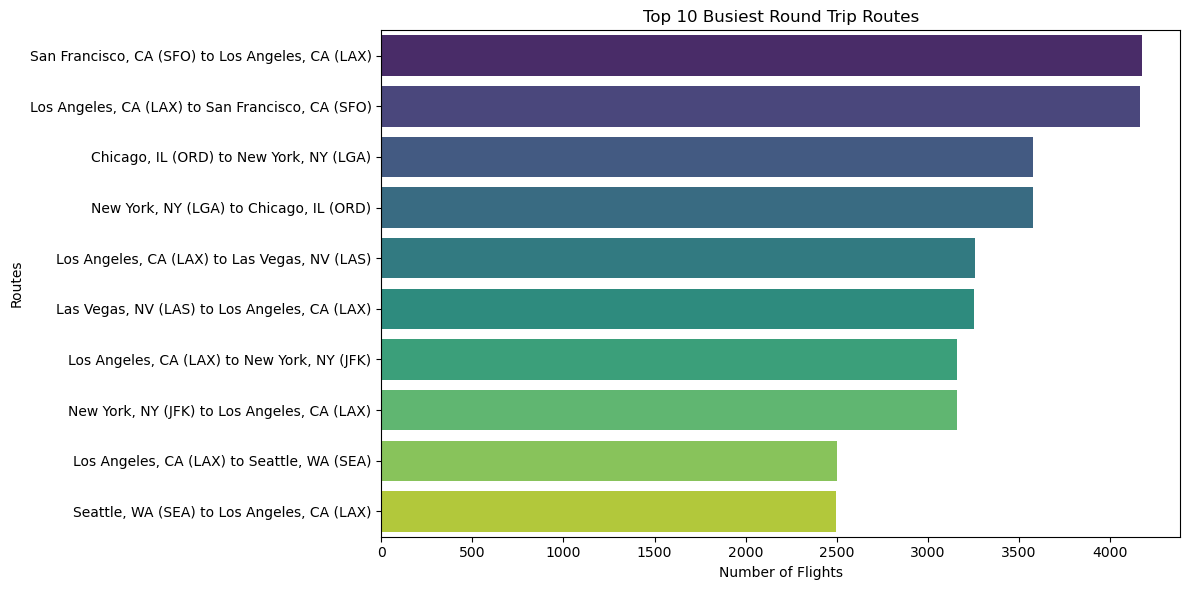

In [137]:
# Identify the 10 busiest round trip routes
busiest_routes = Merged_data.sort_values(by='FLIGHT_COUNT', ascending=False).head(10)

# Plot 
plt.figure(figsize=(12, 6))
sns.barplot(
    x='FLIGHT_COUNT',
    y='ROUTE',
    data=busiest_routes,
    palette='viridis'
)
plt.title('Top 10 Busiest Round Trip Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Routes')
plt.tight_layout()
plt.show()


#### **Top 10 Busiest Round Trip Routes** 
1. San Francisco, CA (SFO) to Los Angeles, CA (LAX)  
2. Los Angeles, CA (LAX) to San Francisco, CA (SFO)  
3. Chicago, IL (ORD) to New York, NY (LGA)  
4. New York, NY (LGA) to Chicago, IL (ORD)  
5. Los Angeles, CA (LAX) to Las Vegas, NV (LAS)  
6. Las Vegas, NV (LAS) to Los Angeles, CA (LAX)  
7. Los Angeles, CA (LAX) to New York, NY (JFK)  
8. New York, NY (JFK) to Los Angeles, CA (LAX)  
9. Los Angeles, CA (LAX) to Seattle, WA (SEA)  
10. Seattle, WA (SEA) to Los Angeles, CA (LAX)  

### 2. Find 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter.Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes.

**Assumptions**

1. **Ticket Prices**:  
   - The `ITIN_FARE` column represents the mean fare per passenger for each route. This ensures that revenue calculations capture average earnings for all passengers on the route.

2. **Passenger Capacity**:  
   - Each flight has a maximum capacity of 200 passengers.  
   - The `OCCUPANCY_RATE` determines actual utilization, ensuring revenue is based on realistic passenger numbers rather than theoretical capacity.

3. **Operating Costs**:  
   - **Fuel, Oil, Maintenance, Crew**: $8 per mile.  
   - **Depreciation, Insurance, and Other Costs**: $1.18 per mile.  
   - **Airport Operational Costs**:  
     - $5,000 per medium airport and $10,000 per large airport, per landing.  
     - For a round trip, this cost is incurred twice.  
   - **Delay Costs**:  
     - The first 15 minutes of delays are free.  
     - Subsequent delays cost $75 per minute for both departures and arrivals.

4. **Baggage Fees**:  
   - Calculated based on the assumption that 50% of passengers check one bag per leg of the round trip.  
   - Each bag incurs a fee of $35 per flight, amounting to $70 per round trip for half the passengers.

5. **Seasonal Fluctuations**:  
   - Seasonal changes in ticket prices are disregarded. Ticket prices remain constant (`MEAN`) throughout the quarter = 1.

6. **Non-Canceled Flights**:  
   - Only non-canceled flights are included in the calculations to reflect actual operational performance and revenue generation.



**Description**

The top 10 most profitable round trip routes are addressed by calculating total revenue and subtracting total costs for each route. Revenue includes ticket sales and baggage fees, while costs account for fuel, maintenance, crew, depreciation, airport fees, and delay penalties. This helps determine which routes generate the highest financial returns, providing a foundation for investment and strategic planning.


C:\Users\charm\AppData\Local\Temp\ipykernel_22520\2544733062.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


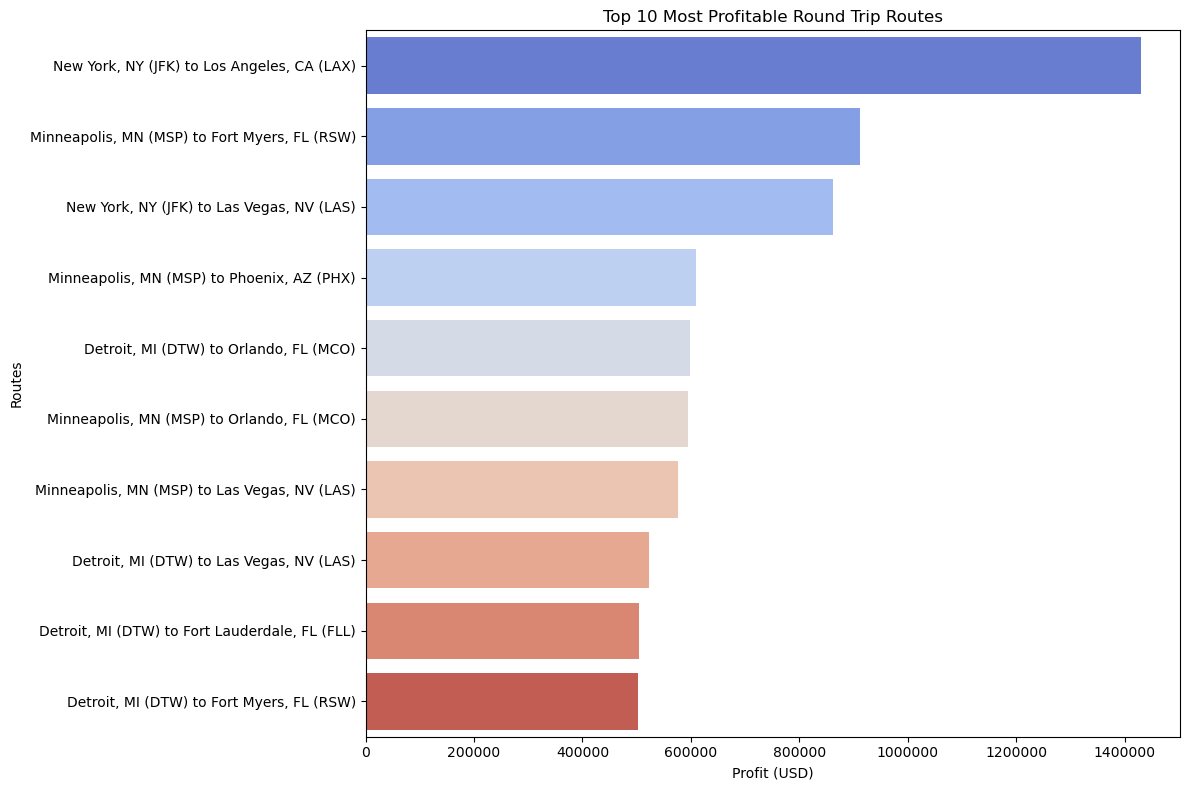

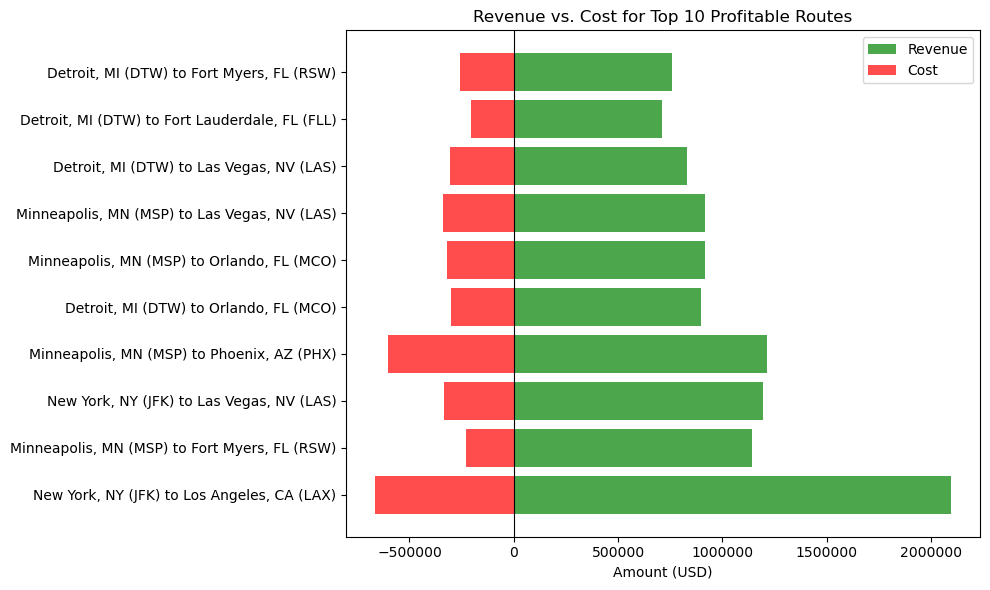

In [140]:
Merged_data['Ticket_Revenue'] = Merged_data['ITIN_FARE'] * Merged_data['PASSENGERS']
Merged_data['Baggage_Revenue'] = Merged_data['PASSENGERS'] * 70 * 0.5
Merged_data['Total_Revenue'] = Merged_data['Ticket_Revenue'] + Merged_data['Baggage_Revenue']
Merged_data['Fuel_Crew_Cost'] = Merged_data['DISTANCE'] * 8
Merged_data['Depreciation_Cost'] = Merged_data['DISTANCE'] * 1.18
Merged_data['Airport_Cost'] = ((Merged_data['TYPE'] == 'medium_airport') * 5000 + (Merged_data['TYPE_destination'] == 'large_airport') * 10000) *2
Merged_data['Delay_Cost'] = ((Merged_data['DEP_DELAY'] - 15).clip(lower=0) + (Merged_data['ARR_DELAY'] - 15).clip(lower=0)) * 75
Merged_data['Total_Cost'] = (Merged_data['Fuel_Crew_Cost'] + Merged_data['Depreciation_Cost'] + Merged_data['Airport_Cost'] + Merged_data['Delay_Cost'])
Merged_data['Profit'] = Merged_data['Total_Revenue'] - Merged_data['Total_Cost']

profitable_routes = Merged_data.sort_values(by='Profit', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Profit',
    y='ROUTE',
    data=profitable_routes,
    palette='coolwarm'
)
plt.title('Top 10 Most Profitable Round Trip Routes')
plt.xlabel('Profit (USD)')
plt.ylabel('Routes')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

# Bar chart for revenue and cost
routes = profitable_routes['ROUTE']
revenue = profitable_routes['Total_Revenue']
cost = -profitable_routes['Total_Cost']  

plt.figure(figsize=(10, 6))
y_positions = np.arange(len(routes))

plt.barh(y_positions, revenue, color='green', alpha=0.7, label='Revenue')
plt.barh(y_positions, cost, color='red', alpha=0.7, label='Cost')

plt.axvline(0, color='black', linewidth=0.8)

plt.yticks(y_positions, routes)
plt.xlabel('Amount (USD)')
plt.title('Revenue vs. Cost for Top 10 Profitable Routes')
plt.legend(loc='upper right')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()


#### **The 10 most profitable round trip routese**
1. New York, NY (JFK) to Los Angeles, CA (LAX)  
2. Minneapolis, MN (MSP) to Fort Myers, FL (RSW)  
3. New York, NY (JFK) to Las Vegas, NV (LAS)  
4. Minneapolis, MN (MSP) to Phoenix, AZ (PHX)  
5. Detroit, MI (DTW) to Orlando, FL (MCO)  
6. Minneapolis, MN (MSP) to Orlando, FL (MCO)  
7. Minneapolis, MN (MSP) to Las Vegas, NV (LAS)  
8. Detroit, MI (DTW) to Las Vegas, NV (LAS)  
9. Detroit, MI (DTW) to Fort Lauderdale, FL (FLL)  
10. Detroit, MI (DTW) to Fort Myers, FL (RSW)  

### 3. Recommend 5 round trip routes

**Assumptions**

1. **Profitability**:  
   - Profit = Total Revenue - Total Cost)

2. **Occupancy Rate**:  
   - High occupancy rates reflect better utilization of aircraft capacity and strong demand.

3. **Passenger Demand**:  
   - Routes with higher passenger counts indicate stronger market demand and higher revenue potential.

4. **Delays**:  
   - Routes with minimal delays (both departure and arrival) are prioritized to reduce operational costs.

5. **Focus on Operational Efficiency**:  
   - The analysis directly prioritizes routes with strong financial performance, efficient capacity use, and reliable operations.

**Description**

The recommended 5 round trip routes are selected based on a combination of profitability, occupancy rates, and passenger demand. We consider on financial returns, operational reliability and customer satisfaction.

                                              ROUTE        Profit  \
2742    New York, NY (JFK) to Los Angeles, CA (LAX)  1.430766e+06   
3740  Minneapolis, MN (MSP) to Fort Myers, FL (RSW)  9.122752e+05   
2741      New York, NY (JFK) to Las Vegas, NV (LAS)  8.625543e+05   
3728     Minneapolis, MN (MSP) to Phoenix, AZ (PHX)  6.090728e+05   
1749         Detroit, MI (DTW) to Orlando, FL (MCO)  5.987906e+05   

      OCCUPANCY_RATE  PASSENGERS  FLIGHT_COUNT  DEP_DELAY  ARR_DELAY  
2742        0.646830      2611.0          3158     8369.0    -4871.0  
3740        0.648430      2350.0           516     2650.0    -2265.0  
2741        0.647210      1555.0           871     3944.0     -912.0  
3728        0.640819      2730.0          1124     7387.0      268.0  
1749        0.646479      2054.0          1014     3618.0     -822.0  


C:\Users\charm\AppData\Local\Temp\ipykernel_22520\1307497503.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='ROUTE', data=recommended_routes, palette='coolwarm', label='Profit')


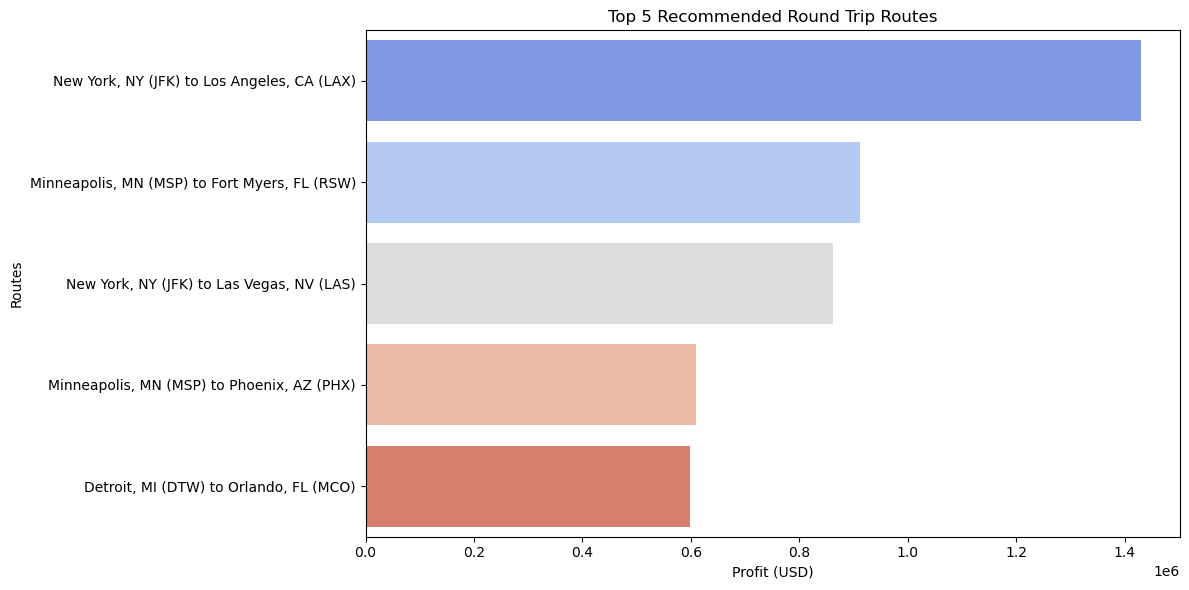

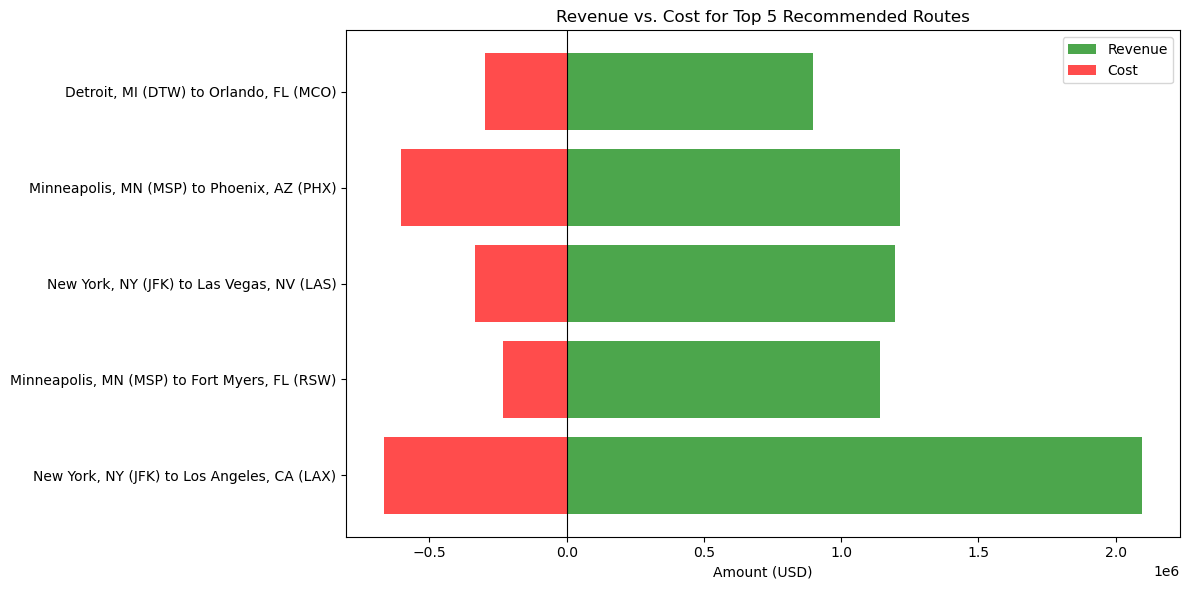

In [142]:
# Sort data by Profit, Occupancy Rate, Passenger Count, and minimal delays
recommended_routes = (Merged_data.sort_values(by=['Profit', 'OCCUPANCY_RATE', 'PASSENGERS', 'DEP_DELAY', 'ARR_DELAY'],
        ascending=[False, False, False, True, True]).head(5))     # Profit, Occupancy, Passengers descending; Delays ascending

# Display the recommended routes
print(recommended_routes[['ROUTE', 'Profit', 'OCCUPANCY_RATE', 'PASSENGERS', 'FLIGHT_COUNT', 'DEP_DELAY', 'ARR_DELAY']])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='ROUTE', data=recommended_routes, palette='coolwarm', label='Profit')
plt.xlabel('Profit (USD)')
plt.ylabel('Routes')
plt.title('Top 5 Recommended Round Trip Routes')
plt.tight_layout()
plt.show()

# Revenue vs. Cost for Recommended Routes
revenue = recommended_routes['Total_Revenue']
cost = -recommended_routes['Total_Cost'] 

plt.figure(figsize=(12, 6))
y_positions = np.arange(len(recommended_routes))
plt.barh(y_positions, revenue, color='green', label='Revenue', alpha=0.7)
plt.barh(y_positions, cost, color='red', label='Cost', alpha=0.7)
plt.axvline(0, color='black', linewidth=0.8)
plt.yticks(y_positions, recommended_routes['ROUTE'])
plt.xlabel('Amount (USD)')
plt.title('Revenue vs. Cost for Top 5 Recommended Routes')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


#### **Top 5 Recommended Round Trip Routes**

1. New York, NY (JFK) to Los Angeles, CA (LAX)  
2. Minneapolis, MN (MSP) to Fort Myers, FL (RSW)  
3. New York, NY (JFK) to Las Vegas, NV (LAS)  
4. Minneapolis, MN (MSP) to Phoenix, AZ (PHX)  
5. Detroit, MI (DTW) to Orlando, FL (MCO)

### 4. The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for these routes.

**Assumptions**

1. The upfront cost of each airplane is $90 million.  
2. Profit per round trip is calculated as the difference between total revenue and total cost.  
3. Only the top 5 recommended routes from **Question 3** are considered for the breakeven analysis.  
4. The breakeven point is the number of round trips required to recover the upfront airplane cost.  

**Description**

This analysis identifies the number of round trips required for each of the 5 recommended routes to recover the $90 million upfront airplane cost. Routes with fewer round trips to breakeven are preferred as they indicate faster return on investment.  

C:\Users\charm\AppData\Local\Temp\ipykernel_22520\1034185585.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


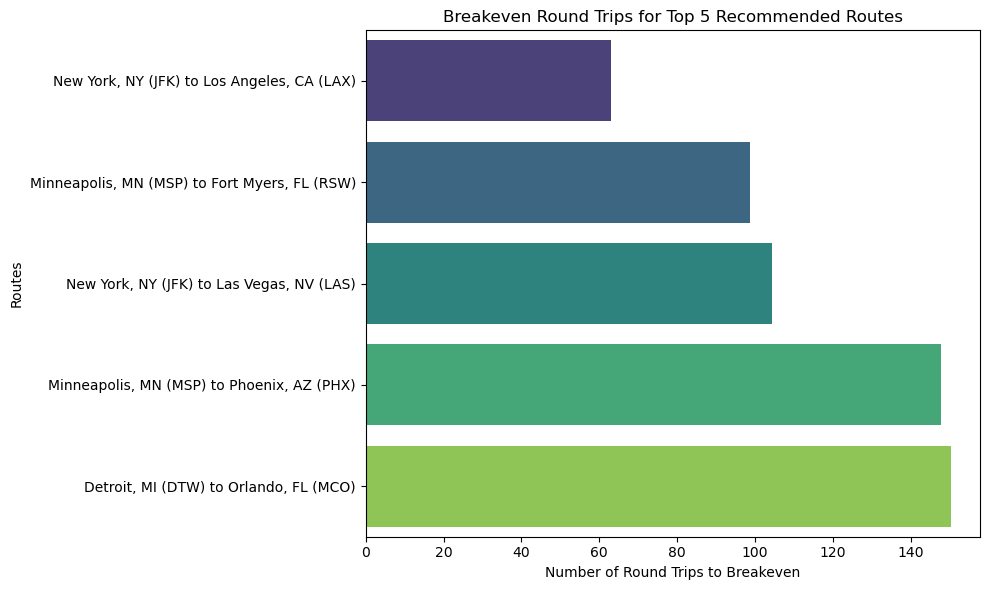

In [143]:
upfront_cost = 90_000_000  
top_5_routes = recommended_routes.copy()  # From Question 3
top_5_routes['Breakeven_Round_Trips'] = upfront_cost / top_5_routes['Profit']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Breakeven_Round_Trips',
    y='ROUTE',
    data=top_5_routes,
    palette='viridis'
)
plt.title('Breakeven Round Trips for Top 5 Recommended Routes')
plt.xlabel('Number of Round Trips to Breakeven')
plt.ylabel('Routes')
plt.tight_layout()
plt.show()

### 5.Reomnend Key Performance Indicators (KPI’s) to track in the future to measure the success of 5 recommended round trip routes.

### **KPIs for Tracking**

#### **1. Financial Metrics**
- **Total Revenue**: Tracks income generated from ticket sales and baggage fees.  
- **Total Cost**: Monitors all operational expenses (fuel, maintenance, airport charges, etc.).  
- **Net Profit**: Reflects overall financial health by subtracting costs from revenue.  
- **Revenue per Passenger**: Revenue normalized by passenger count.  

#### **2. Operational Metrics**
- **Occupancy Rate**: Average occupancy across flights; higher rates indicate better demand utilization.  
- **Delay Metrics**: 
  - Average Departure Delay (minutes)  
  - Average Arrival Delay (minutes)  
  - Percentage of Flights Delayed Beyond 15 Minutes  

#### **3. Customer Metrics**
- **Passenger Count**: Total number of passengers on the route.  
- **Baggage Revenue**: Income from checked baggage fees.  
- **Average Fare per Passenger**: Provides insight into pricing strategy effectiveness.  

#### **4. Strategic Metrics**
- **Breakeven Analysis**: Tracks the number of round trips required to recover the airplane's upfront cost.  
- **Route Diversity**: Monitors the geographical spread of routes to avoid oversaturation in certain regions.  
- **Cost per Mile**: Evaluates cost efficiency on a per-mile basis.

**Description**

1. Financial metrics are prioritized to ensure profitability remains the primary focus.
2. Operational metrics like delays and occupancy rates provide insights into route efficiency and customer satisfaction.
3. Customer satisfaction is indirectly inferred through metrics such as passenger count, baggage revenue, and average delays.  


C:\Users\charm\AppData\Local\Temp\ipykernel_22520\3151645481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpi_data['Revenue_per_Passenger'] = kpi_data['Total_Revenue'] / kpi_data['PASSENGERS']
C:\Users\charm\AppData\Local\Temp\ipykernel_22520\3151645481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpi_data['Average_Departure_Delay'] = profitable_routes['DEP_DELAY'] / profitable_routes['FLIGHT_COUNT']
C:\Users\charm\AppData\Local\Temp\ipykernel_22520\3151645481.py:4: SettingWithCopyWarning: 
A 

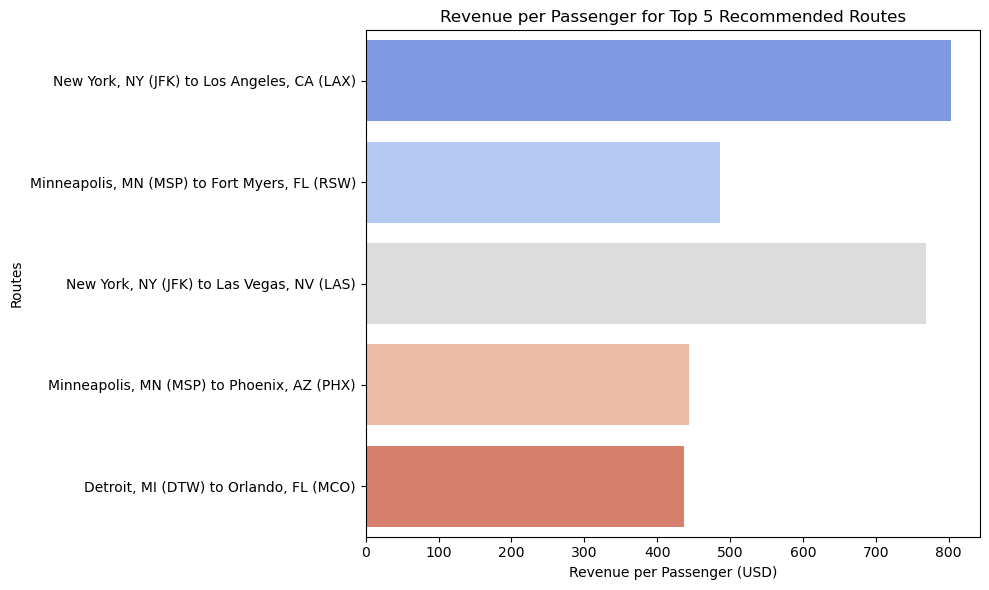

C:\Users\charm\AppData\Local\Temp\ipykernel_22520\3151645481.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\charm\AppData\Local\Temp\ipykernel_22520\3151645481.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


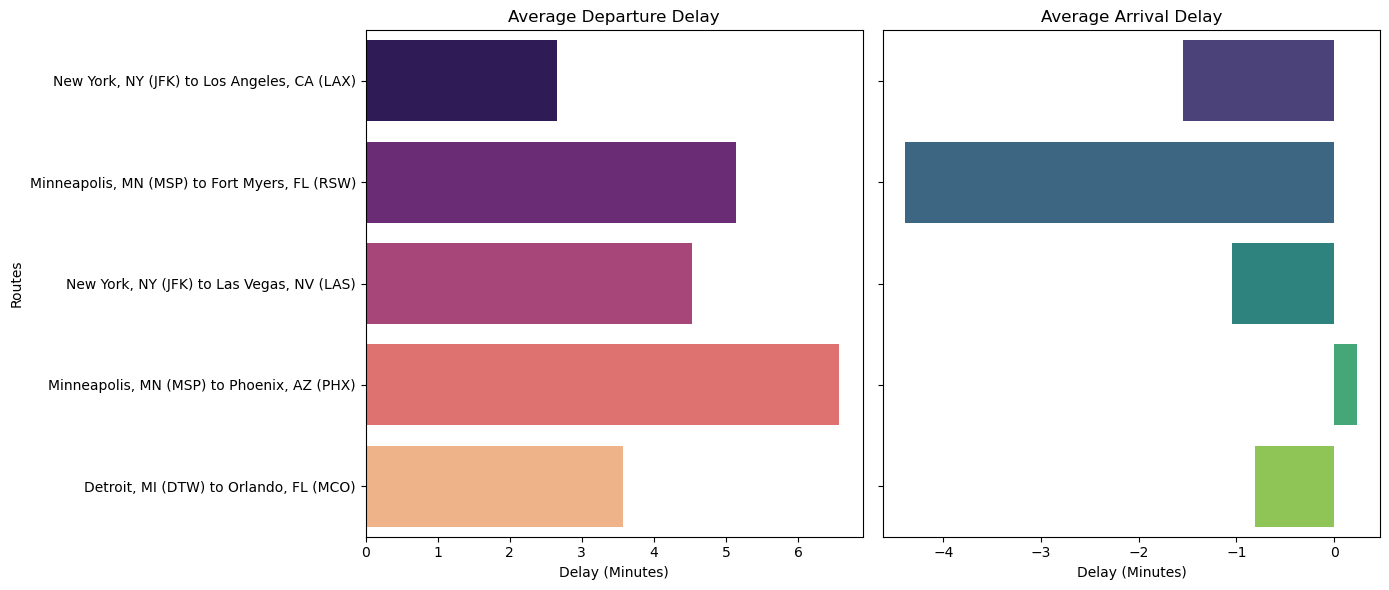

C:\Users\charm\AppData\Local\Temp\ipykernel_22520\3151645481.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


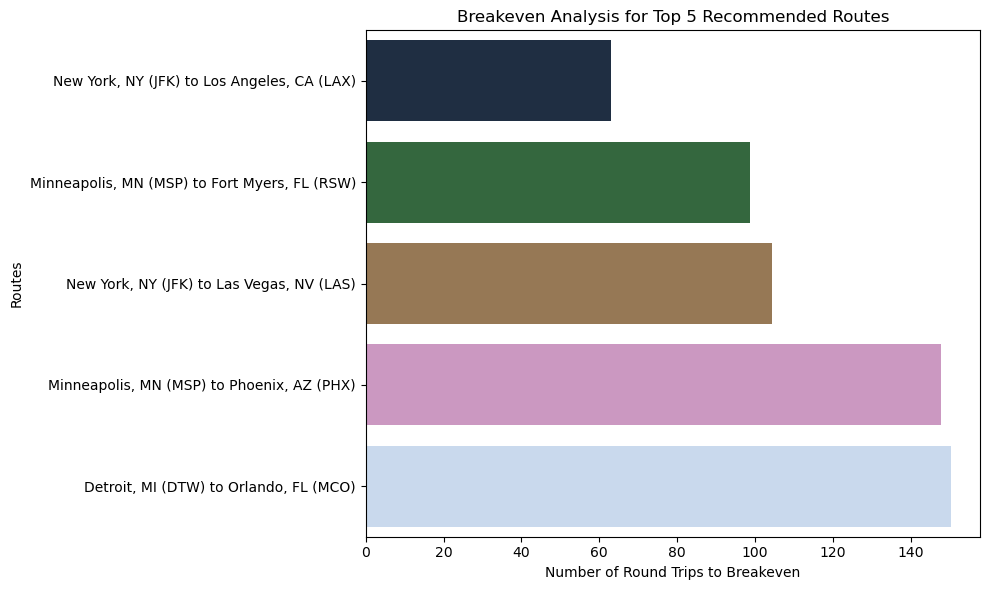

In [145]:
kpi_data = top_5_routes[['ROUTE', 'Total_Revenue', 'Total_Cost', 'Profit', 'OCCUPANCY_RATE', 'PASSENGERS']]
kpi_data['Revenue_per_Passenger'] = kpi_data['Total_Revenue'] / kpi_data['PASSENGERS']
kpi_data['Average_Departure_Delay'] = profitable_routes['DEP_DELAY'] / profitable_routes['FLIGHT_COUNT']
kpi_data['Average_Arrival_Delay'] = profitable_routes['ARR_DELAY'] / profitable_routes['FLIGHT_COUNT']
kpi_data['Percentage_Delayed'] = (profitable_routes['DEP_DELAY'] + profitable_routes['ARR_DELAY']) / profitable_routes['FLIGHT_COUNT']

# Plot Revenue per Passenger
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Revenue_per_Passenger',
    y='ROUTE',
    data=kpi_data,
    palette='coolwarm'
)
plt.title('Revenue per Passenger for Top 5 Recommended Routes')
plt.xlabel('Revenue per Passenger (USD)')
plt.ylabel('Routes')
plt.tight_layout()
plt.show()

# Plot Delay Metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(
    x='Average_Departure_Delay',
    y='ROUTE',
    data=kpi_data,
    palette='magma',
    ax=axes[0]
)
axes[0].set_title('Average Departure Delay')
axes[0].set_xlabel('Delay (Minutes)')
axes[0].set_ylabel('Routes')

sns.barplot(
    x='Average_Arrival_Delay',
    y='ROUTE',
    data=kpi_data,
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('Average Arrival Delay')
axes[1].set_xlabel('Delay (Minutes)')

plt.tight_layout()
plt.show()

# Plot Breakeven Analysis
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Breakeven_Round_Trips',
    y='ROUTE',
    data=top_5_routes,
    palette='cubehelix'
)
plt.title('Breakeven Analysis for Top 5 Recommended Routes')
plt.xlabel('Number of Round Trips to Breakeven')
plt.ylabel('Routes')
plt.tight_layout()
plt.show()

## 5. Final Recommendations

1. Exploring the data inbalance in medium and large aiports, which might impact route selection, as large airports may serve routes with higher passenger demand and profitability. Compare operational costs and revenues between medium and large airports to identify optimal routes.
   
2. The data only focus on Q1, but flight demand may vary throughout the year, which might not reflect seasonal variations in flight demand or profitability. Incorporating other quarters would enhance robustness.

3. Build predictive models for route profitability and delays using historical data, which can explore different scenarios for route investments. We can do simulation.

4. Change Datatype to increase effiency. Before converting data types, conduct a comprehensive audit of potential impacts on data integrity, since there is a situation that the number of missing value increases when change datatype directly from object to datetime and from object to numerical data.
